In [134]:
install.packages("ggplot2")


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//RtmpH3VpnM/downloaded_packages


In [154]:
install.packages("lmtest")
library(lmtest)


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//RtmpH3VpnM/downloaded_packages


## Exploratory Data Analysis

In [135]:
data <- read.csv("/Users/mariapiabellini/Desktop/Unicatt/Econometrics/EmpAnal/Data/birthweight_smoking.csv",sep=';')
head(data)

,nprevist,alcohol,tripre1,tripre2,tripre3,tripre0,birthweight,smoker,unmarried,educ,age,drinks
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,12,0,1,0,0,0,4253,1,1,12,27,0
2,5,0,0,1,0,0,3459,0,0,16,24,0
3,12,0,1,0,0,0,2920,1,0,11,23,0
4,13,0,1,0,0,0,2600,0,0,17,28,0
5,9,0,1,0,0,0,3742,0,0,13,27,0
6,11,0,1,0,0,0,3420,0,0,16,33,0


In [136]:
dim(data)

[1] 3000   12

In [137]:
data$alcohol<-as.factor(data$alcohol)
data$tripre <- as.factor(ifelse(data$tripre1 == 1, 1,
                      ifelse(data$tripre2 == 1, 2,
                             ifelse(data$tripre3 == 1, 3,
                                    ifelse(data$tripre0 == 1, 4, NA)))))
data <- data[, setdiff(names(data), c('tripre1','tripre2','tripre3','tripre0'))]
data$smoker<-as.factor(data$smoker)
data$unmarried<-as.factor(data$unmarried)
summary(data)

    nprevist     alcohol   birthweight   smoker   unmarried      educ      
 Min.   : 0.00   0:2942   Min.   : 425   0:2418   0:2320    Min.   : 0.00  
 1st Qu.: 9.00   1:  58   1st Qu.:3062   1: 582   1: 680    1st Qu.:12.00  
 Median :12.00            Median :3420                      Median :12.00  
 Mean   :10.99            Mean   :3383                      Mean   :12.91  
 3rd Qu.:13.00            3rd Qu.:3750                      3rd Qu.:14.00  
 Max.   :35.00            Max.   :5755                      Max.   :17.00  
      age            drinks         tripre  
 Min.   :14.00   Min.   : 0.00000   1:2412  
 1st Qu.:23.00   1st Qu.: 0.00000   2: 459  
 Median :27.00   Median : 0.00000   3:  99  
 Mean   :26.89   Mean   : 0.05833   4:  30  
 3rd Qu.:31.00   3rd Qu.: 0.00000           
 Max.   :44.00   Max.   :21.00000           

In [138]:
summary(data$birthweight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    425    3062    3420    3383    3750    5755 

In [139]:
for (col in names(data)) {
  print(paste(col,'missing values:'))
  print(sum(is.na(data[[col]])))
}

[1] "nprevist missing values:"
[1] 0
[1] "alcohol missing values:"
[1] 0
[1] "birthweight missing values:"
[1] 0
[1] "smoker missing values:"
[1] 0
[1] "unmarried missing values:"
[1] 0
[1] "educ missing values:"
[1] 0
[1] "age missing values:"
[1] 0
[1] "drinks missing values:"
[1] 0
[1] "tripre missing values:"
[1] 0


## Descriptive Statistics

In [140]:
data$birthweight<-data$birthweight/1000

No id variables; using all as measure variables



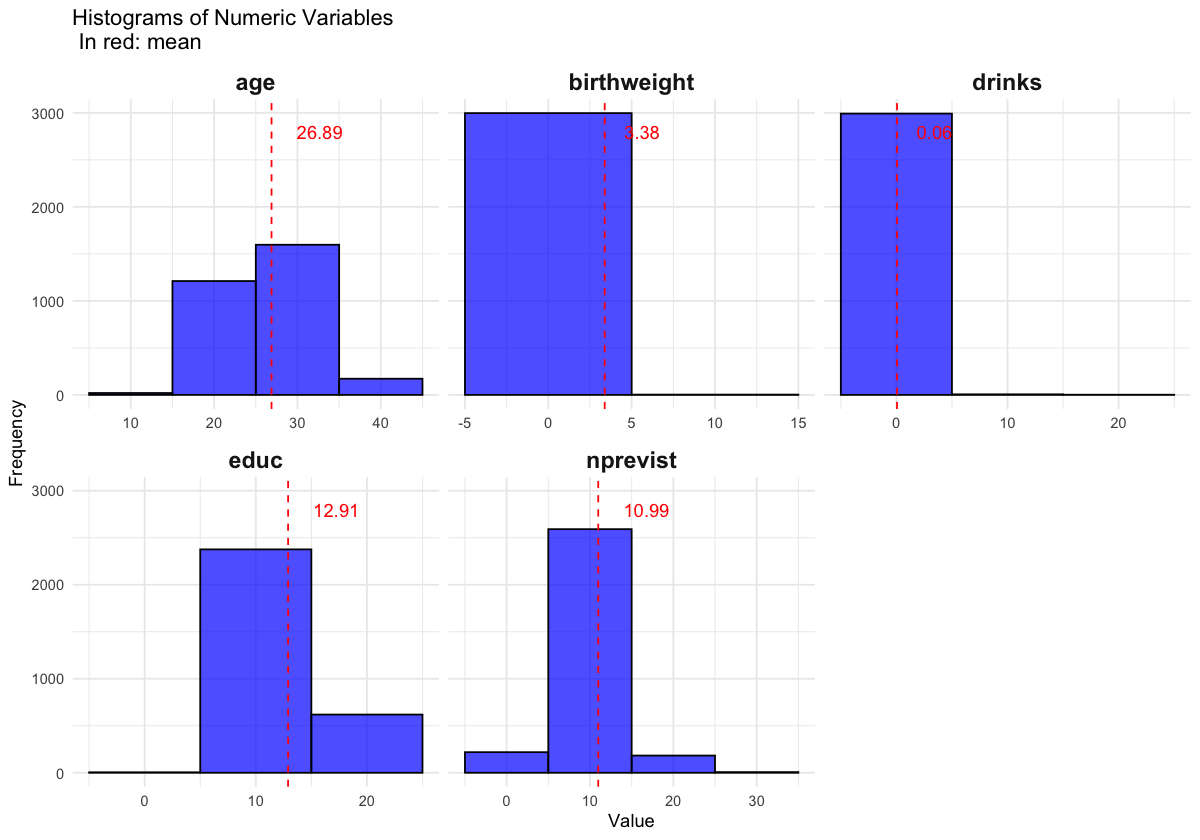

In [141]:
# Load necessary packages
library(ggplot2)
library(reshape2)

# Identify numeric columns
numeric_cols <- sapply(data, is.numeric)
numeric_data <- data[, numeric_cols]

# Calculate means of numeric columns
means <- sapply(numeric_data, mean, na.rm = TRUE)

# Melt the dataframe to long format
data_long <- melt(numeric_data)

# Create histograms using ggplot with mean annotations
p <- ggplot(data_long, aes(x = value)) +
  geom_histogram(binwidth = 10, color = "black", fill = "blue", alpha = 0.7) +
  facet_wrap(~ variable, scales = "free_x") +
  theme_minimal() +
  labs(title = paste("Histograms of Numeric Variables", "\n", "In red: mean"),
       x = "Value",
       y = "Frequency") +
  geom_vline(data = data.frame(variable = names(means), mean = means), aes(xintercept = mean), color = "red", linetype = "dashed") +
  geom_text(data = data.frame(variable = names(means), mean = means), aes(x = mean, y = Inf, label = round(mean, 2)), color = "red", vjust = 3, hjust = -0.55) +
  theme(strip.text = element_text(face = "bold", size = 14))

# Print the plot
print(p)


In [142]:
summary(data)

    nprevist     alcohol   birthweight    smoker   unmarried      educ      
 Min.   : 0.00   0:2942   Min.   :0.425   0:2418   0:2320    Min.   : 0.00  
 1st Qu.: 9.00   1:  58   1st Qu.:3.062   1: 582   1: 680    1st Qu.:12.00  
 Median :12.00            Median :3.420                      Median :12.00  
 Mean   :10.99            Mean   :3.383                      Mean   :12.91  
 3rd Qu.:13.00            3rd Qu.:3.750                      3rd Qu.:14.00  
 Max.   :35.00            Max.   :5.755                      Max.   :17.00  
      age            drinks         tripre  
 Min.   :14.00   Min.   : 0.00000   1:2412  
 1st Qu.:23.00   1st Qu.: 0.00000   2: 459  
 Median :27.00   Median : 0.00000   3:  99  
 Mean   :26.89   Mean   : 0.05833   4:  30  
 3rd Qu.:31.00   3rd Qu.: 0.00000           
 Max.   :44.00   Max.   :21.00000           

In [143]:
selected_cols <- c('alcohol', 'smoker', 'unmarried','tripre')
standard_deviations <- apply(data, 2, sd)
standard_deviations

nprevist     alcohol birthweight      smoker   unmarried        educ 
  3.6720692   0.1377167   0.5921629   0.3954948   0.4187450   2.1666985 
        age      drinks      tripre 
  5.3624868   0.6878141   0.5595564

Warning message:
“attributes are not identical across measure variables; they will be dropped”


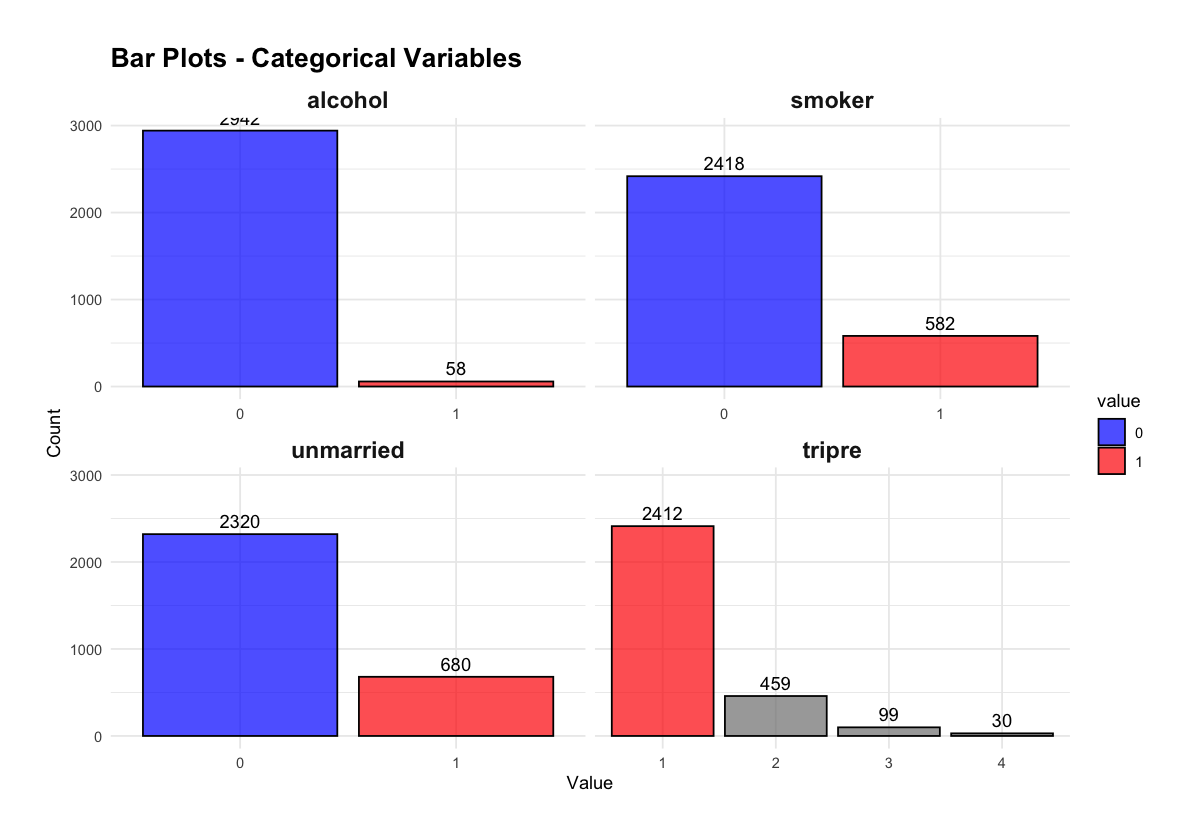

In [165]:
library(ggplot2)
library(reshape2)

categorical_columns <- c("alcohol", "smoker", "unmarried", "tripre")

categorical_data <- data[, categorical_columns]
categorical_data <- data.frame(lapply(categorical_data, as.factor))

data_long <- melt(categorical_data, id.vars = NULL, variable.name = "variable", value.name = "value")

p <- ggplot(data_long, aes(x = value)) +
  geom_bar(aes(fill = value), color = "black", alpha = 0.7, position = "dodge") +
  geom_text(stat = "count", aes(label = ..count..), position = position_dodge(width = 0.9), vjust = -0.5) +
  facet_wrap(~ variable, scales = "free_x") +
  theme_minimal() +
  labs(title = "Bar Plots - Categorical Variables",
       x = "Value",
       y = "Count") +
  scale_fill_manual(values = c("0" = "blue", "1" = "red")) +  # Custom colors for levels
  theme(
    strip.text = element_text(face = "bold", size = 14),
    plot.title = element_text(face = "bold", size = 16),
    plot.margin = margin(1, 1, 1, 1, "cm")
  )

print(p)

## Econometric Model

In [166]:
m1<-lm(birthweight~.,data=data)
summary(m1)


Call:
lm(formula = birthweight ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7886 -0.3025  0.0214  0.3604  2.3091 

Coefficients: (3 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.133042   0.089147  35.145  < 2e-16 ***
nprevist           0.032087   0.003406   9.421  < 2e-16 ***
alcohol1           0.003942   0.094675   0.042  0.96679    
smoker1           -0.178207   0.027436  -6.495 9.67e-11 ***
unmarried1        -0.206856   0.028795  -7.184 8.53e-13 ***
educ               0.001828   0.005562   0.329  0.74242    
age               -0.002143   0.002270  -0.944  0.34533    
drinks            -0.003027   0.018861  -0.160  0.87252    
tripre2            0.059292   0.032059   1.849  0.06449 .  
tripre3            0.175819   0.064035   2.746  0.00607 ** 
tripre4           -0.209527   0.112336  -1.865  0.06226 .  
smoker_numeric           NA         NA      NA       NA    
unmarried_numeric   

In [167]:
m2<-lm(birthweight~nprevist+smoker+unmarried+tripre,data=data)
summary(m2)


Call:
lm(formula = birthweight ~ nprevist + smoker + unmarried + tripre, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.77110 -0.30322  0.02482  0.36115  2.31447 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.096620   0.042616  72.663  < 2e-16 ***
nprevist     0.032121   0.003393   9.466  < 2e-16 ***
smoker1     -0.178724   0.026899  -6.644 3.61e-11 ***
unmarried1  -0.199090   0.026692  -7.459 1.14e-13 ***
tripre2      0.061187   0.031696   1.930  0.05365 .  
tripre3      0.175715   0.063882   2.751  0.00598 ** 
tripre4     -0.211137   0.111961  -1.886  0.05942 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5644 on 2993 degrees of freedom
Multiple R-squared:  0.09352,	Adjusted R-squared:  0.09171 
F-statistic: 51.47 on 6 and 2993 DF,  p-value: < 2.2e-16


In [168]:
cor_matrix <- cor(as.data.frame(lapply(data[,c('nprevist','smoker','unmarried','tripre')], as.numeric)))

print(cor_matrix)

            nprevist     smoker  unmarried     tripre
nprevist   1.0000000 -0.1086352 -0.2331880 -0.5567511
smoker    -0.1086352  1.0000000  0.2377440  0.1402506
unmarried -0.2331880  0.2377440  1.0000000  0.3211613
tripre    -0.5567511  0.1402506  0.3211613  1.0000000


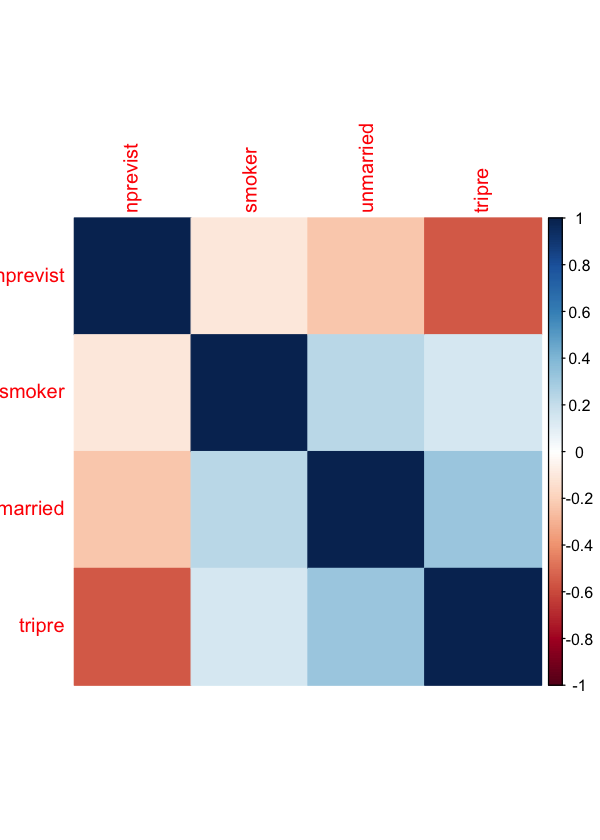

In [169]:
library(corrplot)
options(repr.plot.width=5)
corrplot(cor_matrix, method="color")

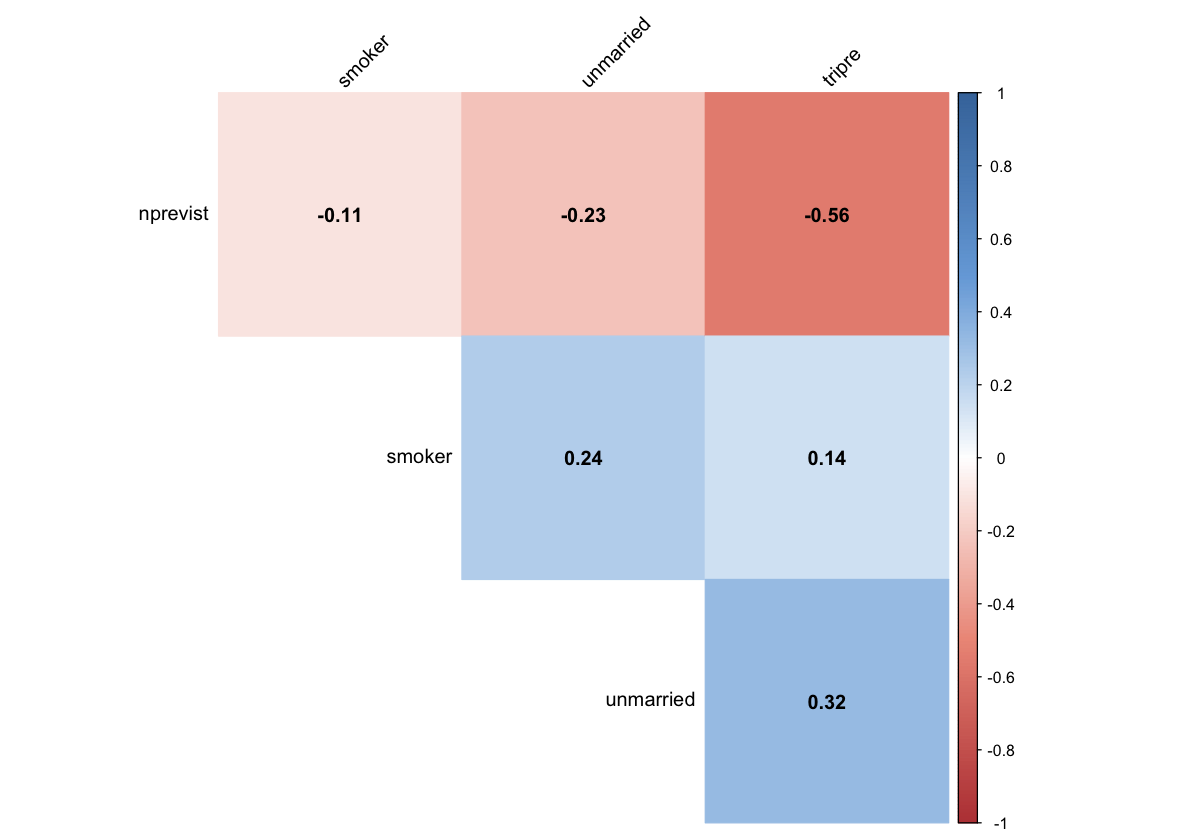

In [170]:
reg<-data[,c('nprevist','smoker','unmarried','tripre')]
cor.mtest <- function(mat, ...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
p.mat <- cor.mtest(as.data.frame(lapply(data[,c('nprevist','smoker','unmarried','tripre')], as.numeric)))

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
options(repr.plot.width=10)
corrplot(cor_matrix, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         p.mat = p.mat, sig.level = 0.01, insig = "blank", 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

## Check if residuals are normally distributed

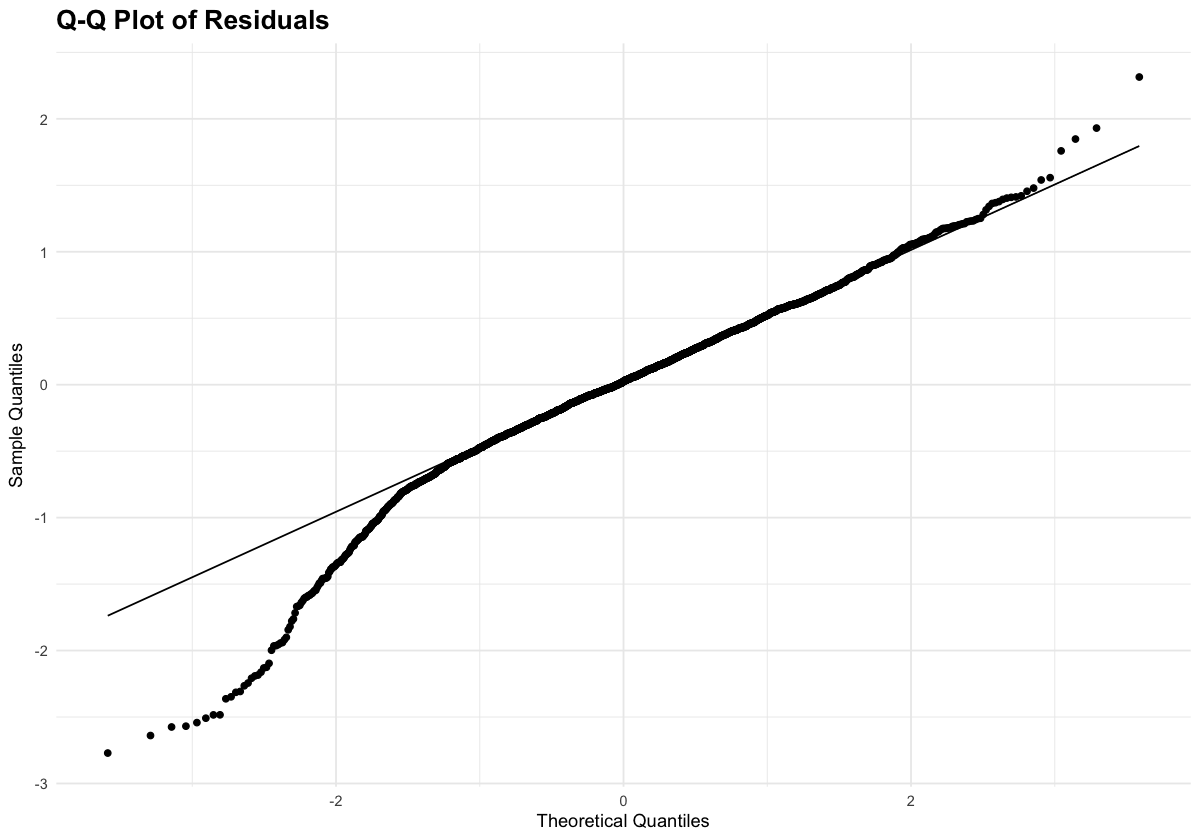

In [171]:
library(ggplot2)

residuals <- resid(m2)
residuals_df <- data.frame(residuals = residuals)

ggplot(residuals_df, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals", x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16)  # Bold and larger title
  )

## Testing for heteroskedasticity

In [176]:
bp_test <- bptest(m2)
print(bp_test)


	studentized Breusch-Pagan test

data:  m2
BP = 37.798, df = 6, p-value = 1.231e-06



## Heteroskedasticity-robust SEs

In [174]:
library(sandwich)

m3<-coeftest(m2, vcov = vcovHC(m2, type = "HC1"))
m3


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  3.0966204  0.0535158 57.8637 < 2.2e-16 ***
nprevist     0.0321211  0.0042485  7.5606 5.304e-14 ***
smoker1     -0.1787240  0.0265028 -6.7436 1.847e-11 ***
unmarried1  -0.1990903  0.0285278 -6.9788 3.650e-12 ***
tripre2      0.0611867  0.0336602  1.8178   0.06920 .  
tripre3      0.1757148  0.0745520  2.3569   0.01849 *  
tripre4     -0.2111375  0.1496006 -1.4113   0.15825    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


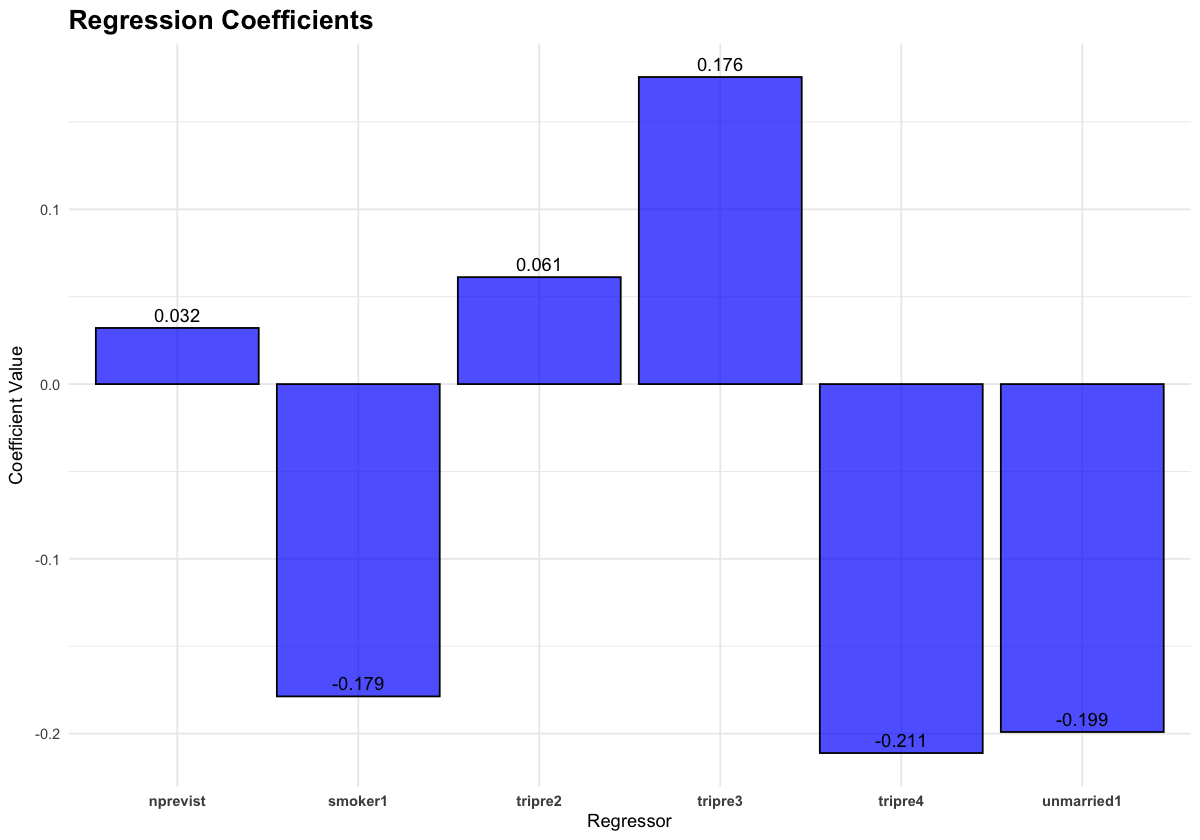

In [175]:
library(ggplot2)

coefficients <- summary(m2)$coefficients[-1, ]
coef_df <- data.frame(
  regressor = rownames(coefficients),
  estimate = coefficients[, "Estimate"]
)

p <- ggplot(coef_df, aes(x = regressor, y = estimate)) +
  geom_bar(stat = "identity", fill = "blue", color = "black", alpha = 0.7) +
  geom_text(aes(label = round(estimate, 3)), vjust = -0.5) +
  labs(title = "Regression Coefficients", x = "Regressor", y = "Coefficient Value") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16), 
    axis.text.x = element_text(face = "bold")  
  )
print(p)

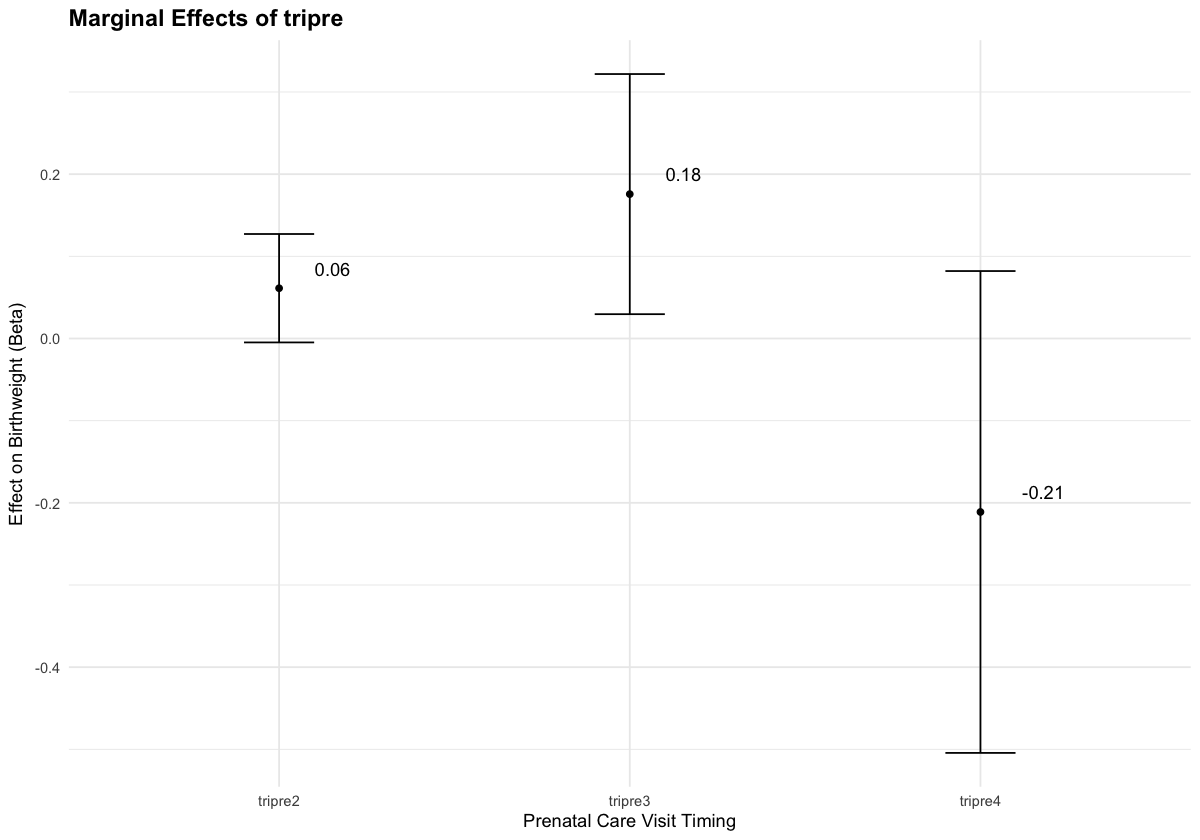

In [184]:
tripre_levels <- grep("tripre", rownames(coefs), value = TRUE)
plot_data <- data.frame(
  term = tripre_levels,
  estimate = coefs[tripre_levels, "Estimate"],
  conf.low = coefs[tripre_levels, "Estimate"] - 1.96 * robust_se[tripre_levels],
  conf.high = coefs[tripre_levels, "Estimate"] + 1.96 * robust_se[tripre_levels]
)

# Create the plot
ggplot(plot_data, aes(x = term, y = estimate)) +
  geom_point() +
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = 0.2) +
  geom_text(aes(label = round(estimate, 2)), vjust = -1, hjust = -1) +
  labs(title = "Marginal Effects of tripre",
       x = "Prenatal Care Visit Timing",
       y = "Effect on Birthweight (Beta)") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14)
  )